In [11]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')
print(df)

     Ranking_x     District              State  Population_x Growth_x  \
0          326        JAMMU  Jammu and Kashmir       1529958   12.74%   
1          326        JAMMU  Jammu and Kashmir       1529958   12.74%   
2          326        JAMMU  Jammu and Kashmir       1529958   12.74%   
3          326        JAMMU  Jammu and Kashmir       1529958   12.74%   
4          326        JAMMU  Jammu and Kashmir       1529958   12.74%   
..         ...          ...                ...           ...      ...   
799        604       KARGIL  Jammu and Kashmir        140802   18.02%   
800        609  LADAKH(LEH)  Jammu and Kashmir        133487   13.87%   
801        609  LADAKH(LEH)  Jammu and Kashmir        133487   13.87%   
802        609  LADAKH(LEH)  Jammu and Kashmir        133487   13.87%   
803        609  LADAKH(LEH)  Jammu and Kashmir        133487   13.87%   

     Sex-Ratio_x  Literacy_x   Area  population density  Ranking_y Growth_y  \
0            880       83.45   2342         

In [12]:
# Drop one of the redundant columns
df.drop(columns=['state'], inplace=True)
df.drop(columns=['State'], inplace=True)
df.drop(columns=['Growth_y'], inplace=True)
df.drop(columns=['Ranking_y'], inplace=True)


# Print the DataFrame to verify the removal of the column
print(df)

     Ranking_x     District  Population_x Growth_x  Sex-Ratio_x  Literacy_x  \
0          326        JAMMU       1529958   12.74%          880       83.45   
1          326        JAMMU       1529958   12.74%          880       83.45   
2          326        JAMMU       1529958   12.74%          880       83.45   
3          326        JAMMU       1529958   12.74%          880       83.45   
4          326        JAMMU       1529958   12.74%          880       83.45   
..         ...          ...           ...      ...          ...         ...   
799        604       KARGIL        140802   18.02%          810       71.34   
800        609  LADAKH(LEH)        133487   13.87%          690       77.20   
801        609  LADAKH(LEH)        133487   13.87%          690       77.20   
802        609  LADAKH(LEH)        133487   13.87%          690       77.20   
803        609  LADAKH(LEH)        133487   13.87%          690       77.20   

      Area  population density  Normalized_Nighttim

In [13]:
df.to_csv('modified_cleaned_data.csv', index=False) 

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('modified_cleaned_data.csv')

# Drop irrelevant columns if any
df.drop(['District'], axis=1, inplace=True)

In [17]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # Using 'most_frequent' strategy for categorical variables
df['Urbanization_Level'].fillna(df['Urbanization_Level'].mode()[0], inplace=True)  # Assuming Urbanization_Level is categorical
df_filled = imputer.fit_transform(df)


In [20]:
# Convert categorical variables to dummy variables if needed
df_encoded = pd.get_dummies(df, columns=['Urbanization_Level'])


In [22]:
df['Growth_x'] = df['Growth_x'].str.rstrip('%').astype(float)

In [24]:
# Normalize numerical features
scaler = StandardScaler()
num_features = ['Population_x', 'Sex-Ratio_x', 'Literacy_x', 'Area', 'population density', 'Normalized_Nighttime_Light_Intensity', 'lat', 'long', 'Urbanization_Cluster']
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

In [25]:
# Save preprocessed data to a new file
df_encoded.to_csv('preprocessed_data.csv', index=False)

In [27]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('preprocessed_data.csv')

# Print the unique rows
unique_rows = df.drop_duplicates()
print(unique_rows)


     Ranking_x  Population_x Growth_x  Sex-Ratio_x  Literacy_x       Area  \
0          326      1.995303   12.74%    -0.356245    2.031552  -0.098525   
1          326      1.995303   12.74%    -0.356245    2.031552  -0.098525   
2          326      1.995303   12.74%    -0.356245    2.031552  -0.098525   
3          326      1.995303   12.74%    -0.356245    2.031552  -0.098525   
4          326      1.995303   12.74%    -0.356245    2.031552  -0.098525   
..         ...           ...      ...          ...         ...        ...   
799        604     -1.503382   18.02%    -2.652072    0.581149   3.141914   
800        609     -1.521805   13.87%    -6.587775    1.282995  11.752603   
801        609     -1.521805   13.87%    -6.587775    1.282995  11.752603   
802        609     -1.521805   13.87%    -6.587775    1.282995  11.752603   
803        609     -1.521805   13.87%    -6.587775    1.282995  11.752603   

     population density  Normalized_Nighttime_Light_Intensity       lat  \


## Exploratory Data Analysis

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df = pd.read_csv('preprocessed_data.csv')  

In [31]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Ranking_x  Population_x Growth_x  Sex-Ratio_x  Literacy_x      Area  \
0        326      1.995303   12.74%    -0.356245    2.031552 -0.098525   
1        326      1.995303   12.74%    -0.356245    2.031552 -0.098525   
2        326      1.995303   12.74%    -0.356245    2.031552 -0.098525   
3        326      1.995303   12.74%    -0.356245    2.031552 -0.098525   
4        326      1.995303   12.74%    -0.356245    2.031552 -0.098525   

   population density  Normalized_Nighttime_Light_Intensity       lat  \
0            0.752928                              1.158901 -1.208978   
1            0.752928                              1.158901 -1.217224   
2            0.752928                              1.158901 -1.279069   
3            0.752928                              1.158901 -1.298574   
4            0.752928                              1.158901 -1.180910   

       long  Urbanization_Cluster  Urbanization_Level_High Urbanization  \
0 -0.09999

In [32]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        Ranking_x  Population_x   Sex-Ratio_x    Literacy_x          Area  \
count  804.000000  8.040000e+02  8.040000e+02  8.040000e+02  8.040000e+02   
mean   491.733831 -1.414015e-16  1.378665e-15 -5.302558e-17  6.849137e-17   
std     80.234999  1.000622e+00  1.000622e+00  1.000622e+00  1.000622e+00   
min    326.000000 -1.521805e+00 -6.587775e+00 -1.463307e+00 -6.757297e-01   
25%    444.000000 -8.255495e-01 -3.562448e-01 -8.692532e-01 -3.703626e-01   
50%    520.000000 -3.054675e-01 -2.826951e-02 -2.225007e-01 -9.852483e-02   
75%    557.000000  6.808141e-01  3.653008e-01  3.499951e-01 -1.823432e-02   
max    609.000000  1.995303e+00  1.972380e+00  2.031552e+00  1.175260e+01   

       population density  Normalized_Nighttime_Light_Intensity           lat  \
count        8.040000e+02                          8.040000e+02  8.040000e+02   
mean         8.395716e-17                          1.237263e-16 -3.022458e-15   
std          1.000622e+00                 

In [33]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Ranking_x                                 0
Population_x                              0
Growth_x                                  0
Sex-Ratio_x                               0
Literacy_x                                0
Area                                      0
population density                        0
Normalized_Nighttime_Light_Intensity      0
lat                                       0
long                                      0
Urbanization_Cluster                      0
Urbanization_Level_High Urbanization      0
Urbanization_Level_Low Urbanization       0
Urbanization_Level_Medium Urbanization    0
dtype: int64


In [34]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df.corr()
print(corr_matrix)


Correlation matrix:
                                        Ranking_x  Population_x  Sex-Ratio_x  \
Ranking_x                                1.000000     -0.997274     0.091051   
Population_x                            -0.997274      1.000000    -0.106860   
Sex-Ratio_x                              0.091051     -0.106860     1.000000   
Literacy_x                              -0.595330      0.589464    -0.311898   
Area                                     0.050079     -0.048297    -0.416358   
population density                      -0.158004      0.135804     0.181577   
Normalized_Nighttime_Light_Intensity    -0.297813      0.321965    -0.374363   
lat                                      0.085408     -0.071015    -0.112935   
long                                     0.266308     -0.285177     0.201043   
Urbanization_Cluster                     0.137986     -0.126971    -0.018316   
Urbanization_Level_High Urbanization    -0.242490      0.239450     0.330484   
Urbanization_Level_

C:\Users\cheth\AppData\Local\Temp\ipykernel_11576\3764775445.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


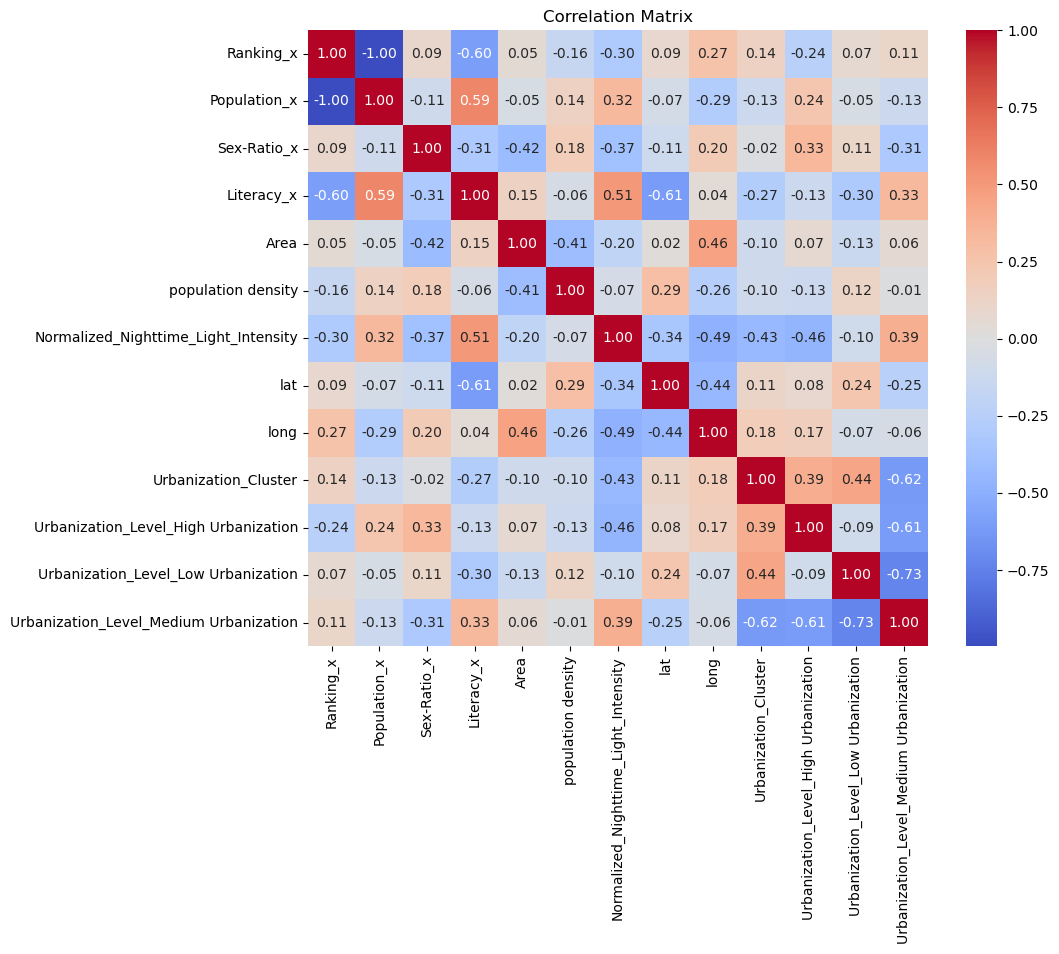

In [35]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

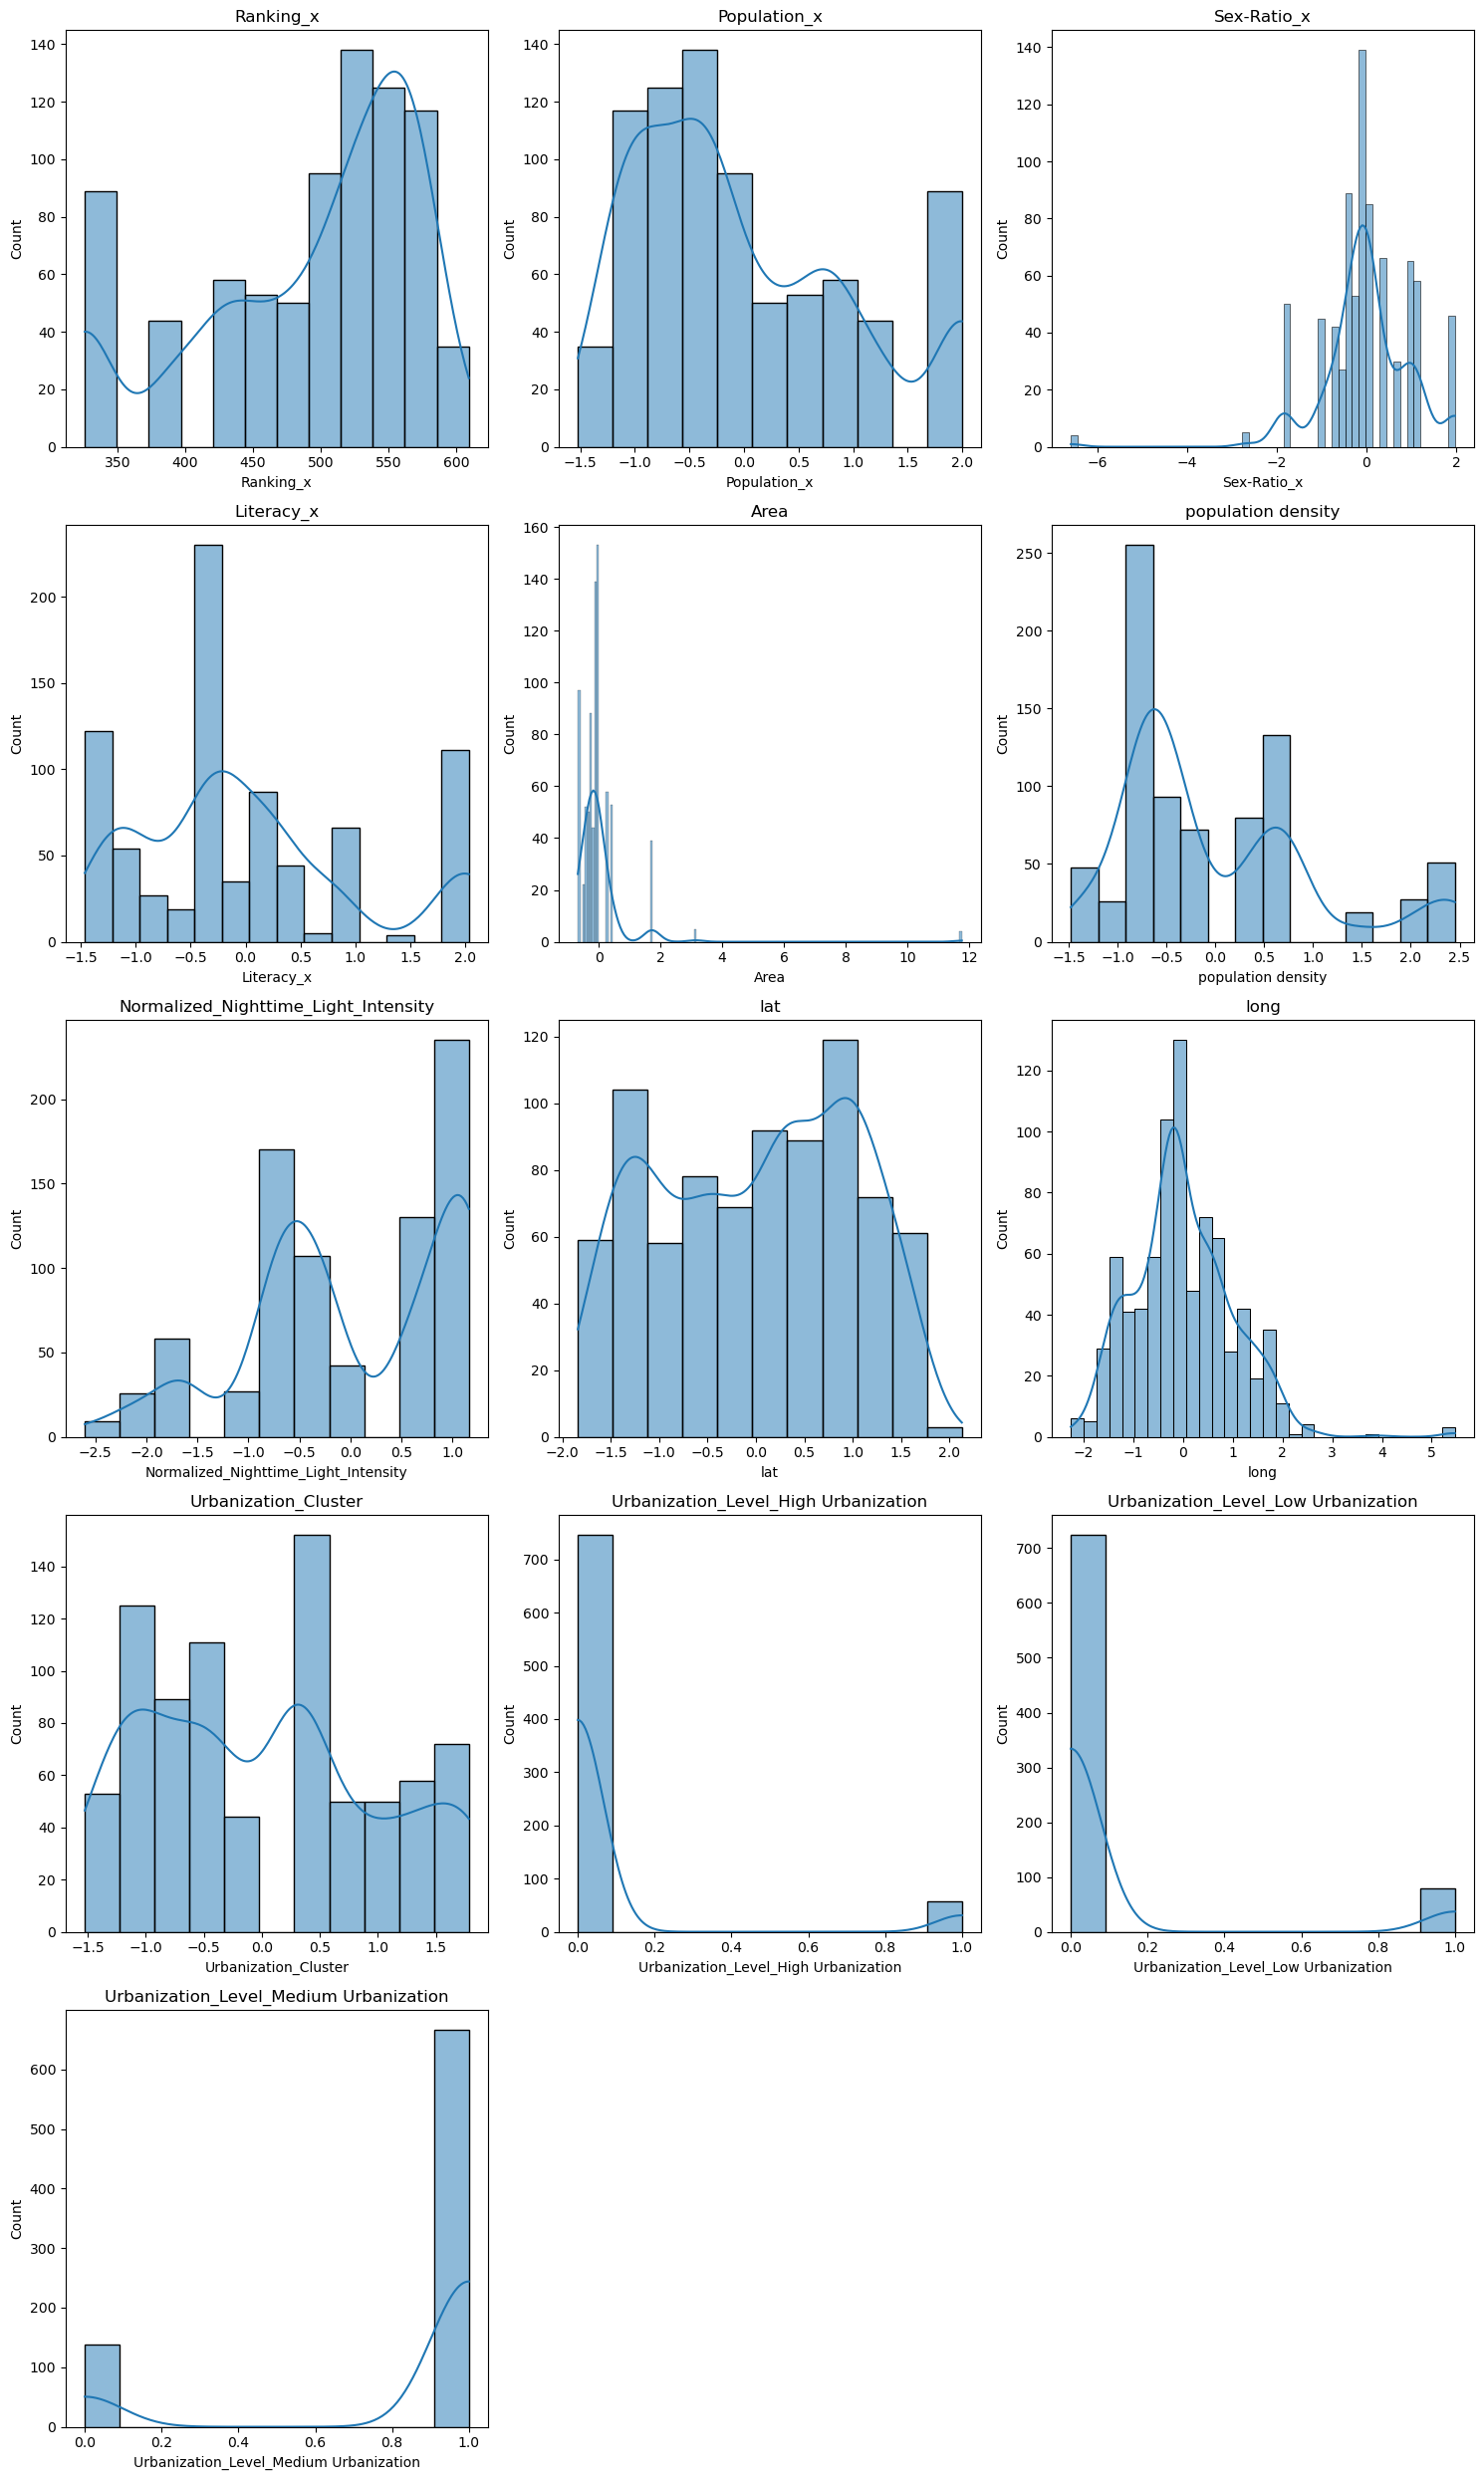

In [37]:
import math

# Histograms for numerical variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_count = len(num_cols)
cols_per_row = 3
rows = math.ceil(num_cols_count / cols_per_row)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


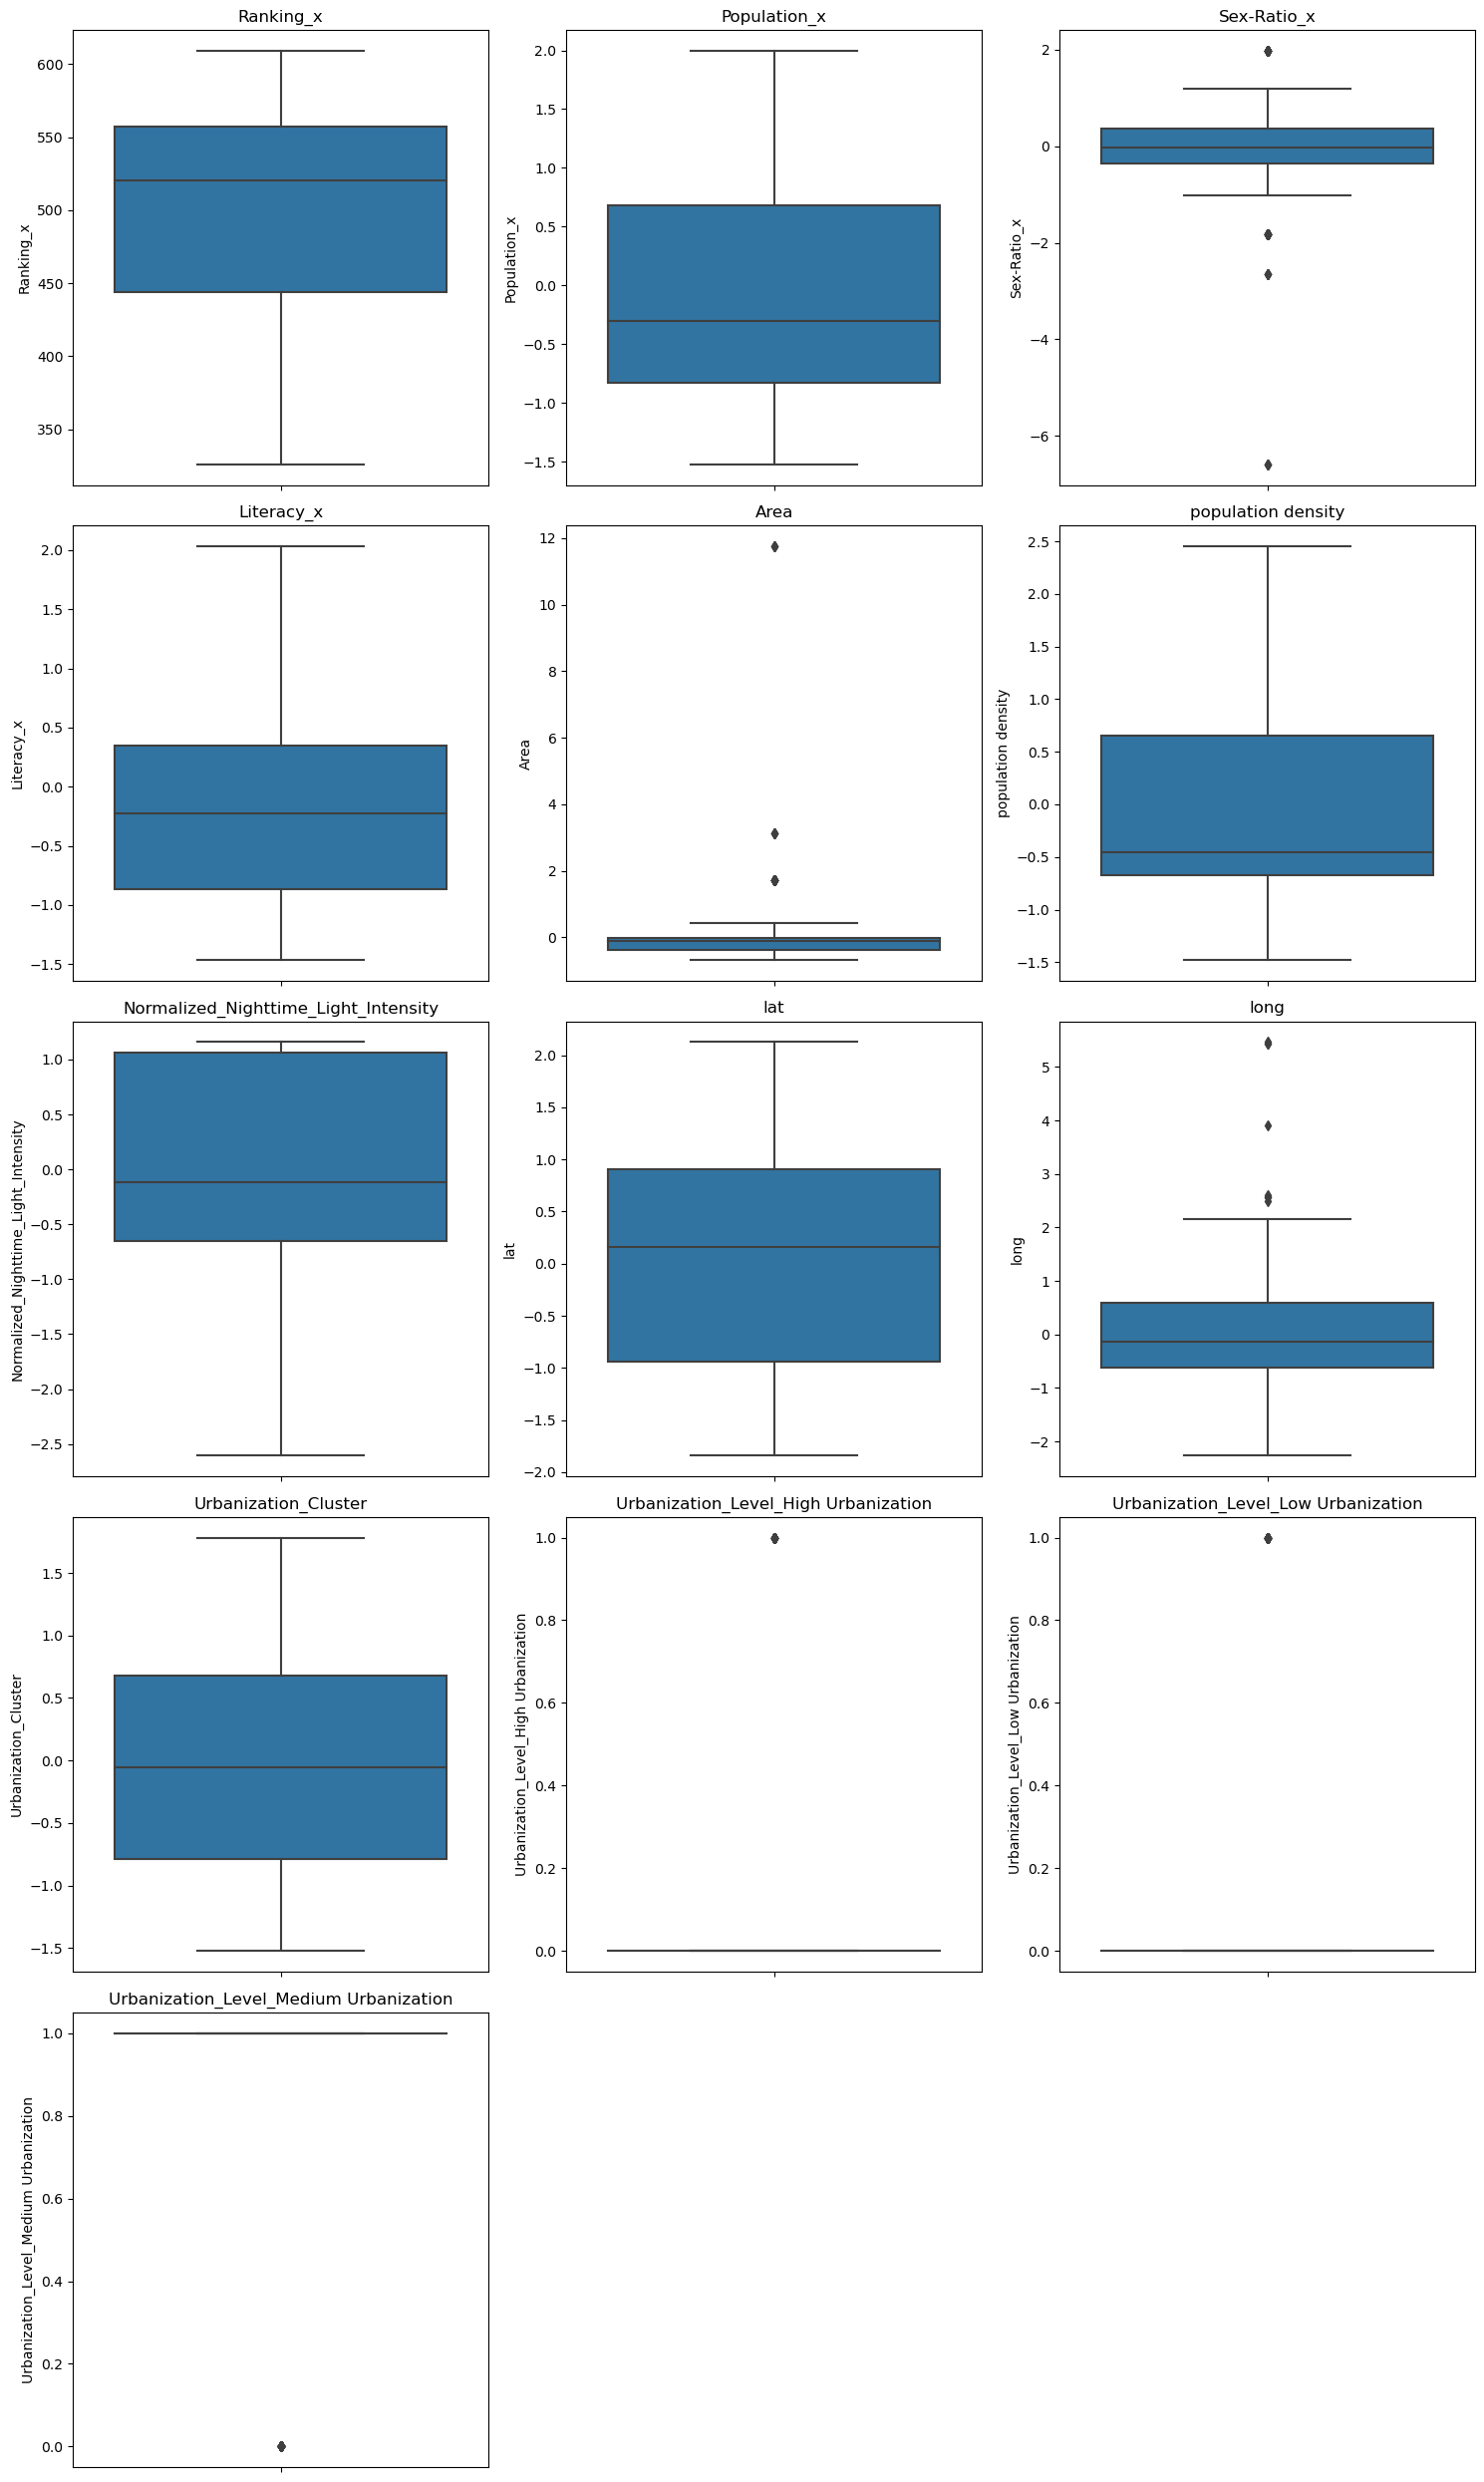

In [39]:

import math

# Boxplots for numerical variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_count = len(num_cols)
cols_per_row = 3
rows = math.ceil(num_cols_count / cols_per_row)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


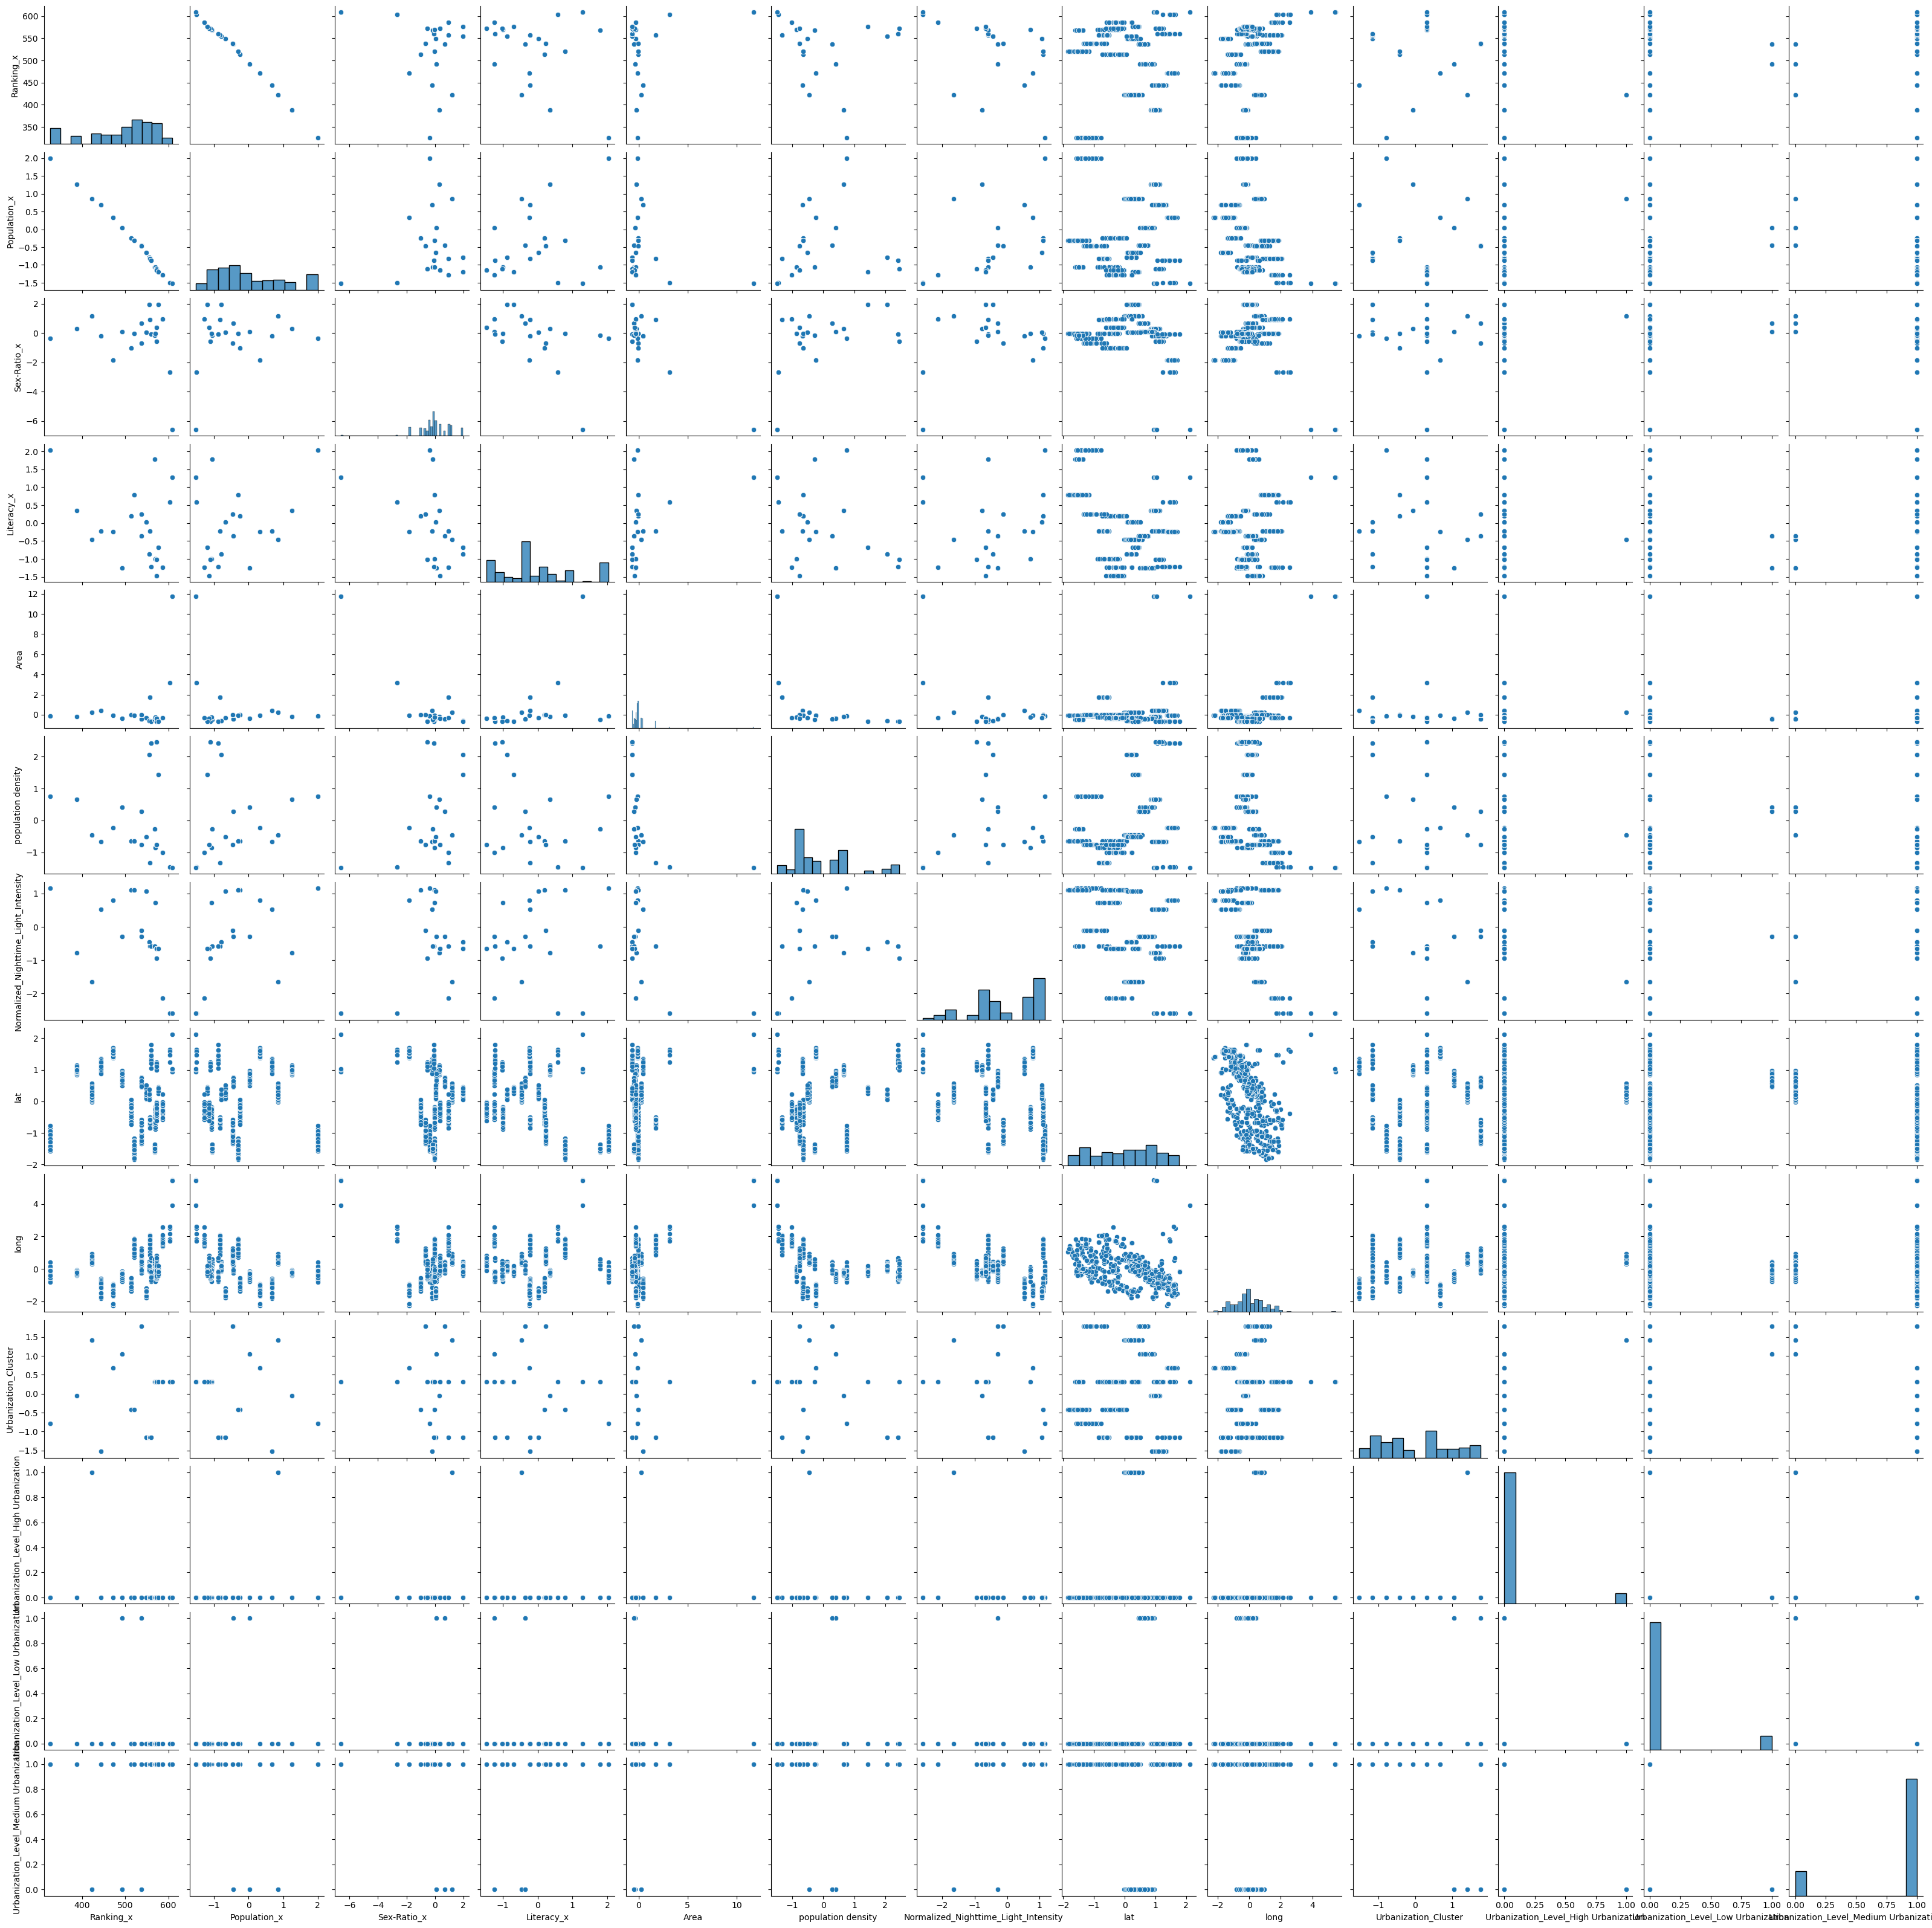

In [40]:
# Pairplot for numerical variables
sns.pairplot(df[num_cols])
plt.show()

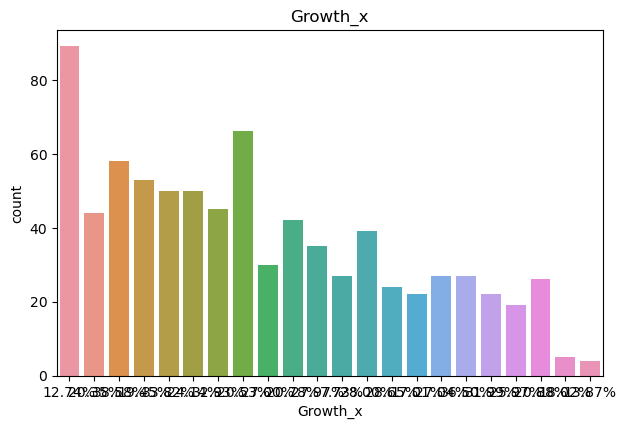

In [41]:
# Countplot for categorical variables (if any)
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=col)
        plt.title(col)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical variables found in the dataset.")

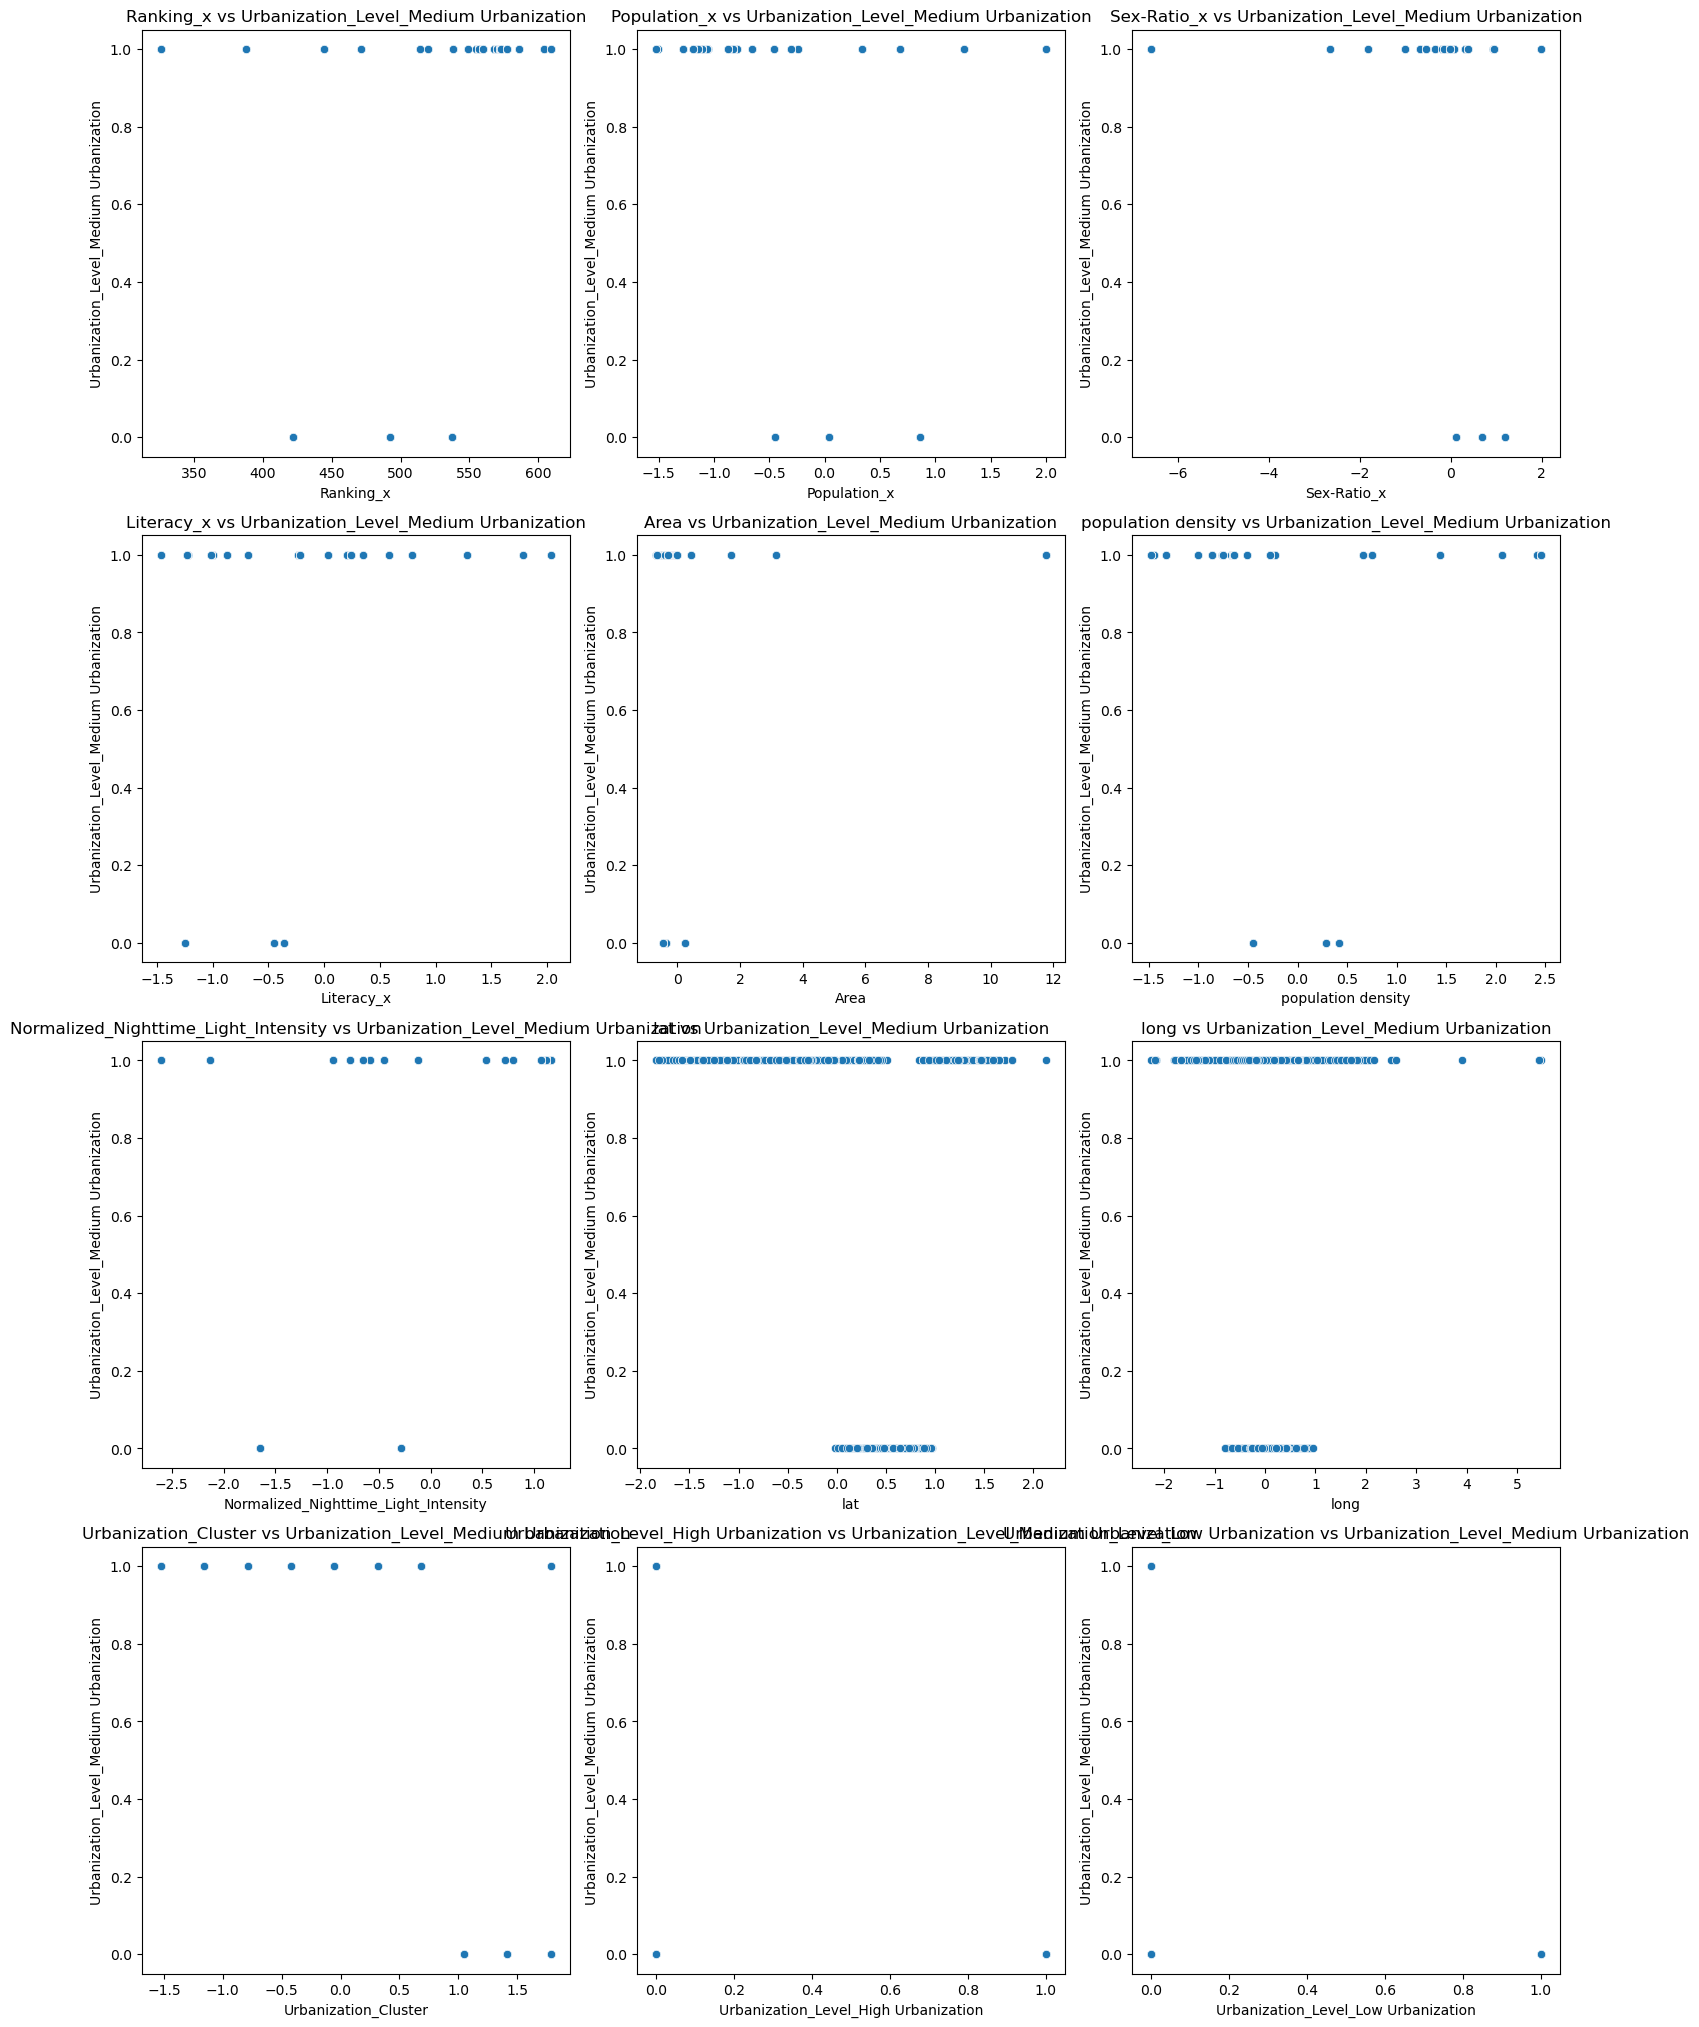

In [43]:
import math

# Scatter plots for numerical variables
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols[:-1], 1):
    plt.subplot(rows, cols_per_row, i)
    sns.scatterplot(data=df, x=col, y=num_cols[-1])
    plt.title(f'{col} vs {num_cols[-1]}')
plt.tight_layout()
plt.show()


## adhhaar placement

In [61]:
import pandas as pd
from sklearn.cluster import KMeans

# Load preprocessed dataset
dataset = pd.read_csv("preprocessed_data.csv")

# Extract relevant features
features = dataset[['Population_x', 'population density', 'lat', 'long']]

# Perform K-means clustering to identify high-demand areas
kmeans = KMeans(n_clusters=80, random_state=0)
dataset['Cluster'] = kmeans.fit_predict(features)

# Calculate centroid of each cluster
cluster_centers = kmeans.cluster_centers_

# Calculate distance from each location to the centroid of its cluster
dataset['Distance_to_Centroid'] = dataset.apply(lambda row: ((row['lat'] - cluster_centers[row['Cluster']][0])**2 + (row['long'] - cluster_centers[row['Cluster']][1])**2)**0.5, axis=1)

# Sort locations by distance to centroid within each cluster
sorted_dataset = dataset.sort_values(by=['Cluster', 'Distance_to_Centroid'])

# Select top locations from each cluster as optimal Aadhaar center locations
num_centers_per_cluster = 35
optimal_centers = sorted_dataset.groupby('Cluster').head(num_centers_per_cluster)

# Output optimal Aadhaar center locations
print("Optimal Aadhaar Center Locations:")
print(optimal_centers[['lat', 'long']])


C:\Users\cheth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal Aadhaar Center Locations:
          lat      long
423 -1.589880  1.028872
398 -1.682331  0.961185
416 -1.694224  0.991563
446 -1.550236  1.146509
439 -1.715315  1.049668
..        ...       ...
722  1.197110 -0.028226
712  1.198855 -0.027614
719  1.198855 -0.029041
725  1.203453 -0.033323
726  1.203929 -0.033526

[789 rows x 2 columns]


In [62]:
# Calculate accuracy
total_districts = len(dataset)
correctly_identified_districts = len(optimal_centers)
accuracy = correctly_identified_districts / total_districts

# Output accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9813432835820896


In [64]:

optimal_centers[['lat', 'long']].to_csv("optimal_centers.csv", index=False)


In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load potential locations from CSV
potential_locations_df = pd.read_csv('optimal_centers.csv')

# Extract latitude and longitude columns
# Extract latitude and longitude columns
potential_locations = potential_locations_df[['lat', 'long']]

# Load the original dataset
original_dataset = pd.read_csv('modified_cleaned_data.csv')

# Extract the features used for scaling from the original dataset
features_for_scaling = original_dataset[['lat', 'long']] 
# Create a new scaler object and fit it to the original data
scaler = StandardScaler()
scaler.fit(features_for_scaling)

# Descale the potential locations
descaled_locations = scaler.inverse_transform(potential_locations)

# Create a DataFrame with descaled locations
descaled_locations_df = pd.DataFrame(descaled_locations, columns=['Latitude', 'Longitude'])

# Optionally, you can save the descaled locations to a new CSV file
descaled_locations_df.to_csv('descaled_optimal_centers.csv', index=False)


In [68]:
import pandas as pd
import folium

# Read the CSV file containing the original dataset
dataset = pd.read_csv('descaled_optimal_centers.csv')

In [69]:
# Create a map centered around a specific location
mymap = folium.Map(location=[dataset['Latitude'].mean(), dataset['Longitude'].mean()], zoom_start=10)

# Add markers for each location in the dataset
for index, row in original_dataset.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f'Location {index+1}').add_to(mymap)

# Display the map
mymap

In [70]:
mymap.save("predicted_centers.html")
